In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

import utils as u
from visualization import papermode

papermode(plt, size=18)


In [3]:
filename = u.get_filename("H37")
basename = u.get_basename(filename)
datadir = u.get_rundir(basename)

figdir = u.get_figdir("thesis", subdir="experimental-setup")
elec_path = datadir / "elec" / f"{basename}_elec_status.csv"
odom_path = datadir / "odom" / f"{basename}_odom_joint_states.csv"

elec_df = pd.read_csv(elec_path)
odom_df = pd.read_csv(odom_path)


In [4]:
elec_df = elec_df[
    [
        "time",
        "/status/current/drive_left",
        "/status/current/drive_right",
    ]
].copy()
odom_df = odom_df[
    [
        "time",
        "/joint_states/velocity/left",
        "/joint_states/velocity/right",
    ]
].copy()


In [5]:

elec_df = elec_df.rename(
    columns={
        "/status/current/drive_left": "current_L",
        "/status/current/drive_right": "current_R",
    }
)
odom_df= odom_df.rename(
    columns={
        "/joint_states/velocity/left": "speed_L",
        "/joint_states/velocity/right": "speed_R",
    }
)
print(elec_df.head(),odom_df.head(), sep="\n")


           time  current_L  current_R
0  1.687554e+09       0.59       0.59
1  1.687554e+09       0.59       0.59
2  1.687554e+09       0.59       0.59
3  1.687554e+09       0.59       0.59
4  1.687554e+09       0.59       0.59
           time  speed_L  speed_R
0  1.687554e+09      0.0      0.0
1  1.687554e+09      0.0      0.0
2  1.687554e+09      0.0      0.0
3  1.687554e+09      0.0      0.0
4  1.687554e+09      0.0      0.0


In [6]:
time_min = min(elec_df.time.min(), odom_df.time.min())

elec_df["time_rel"] = elec_df.time - time_min
odom_df["time_rel"] = odom_df.time - time_min

time_max = max(elec_df.time_rel.max(), odom_df.time_rel.max())


(-0.15, 0.5)


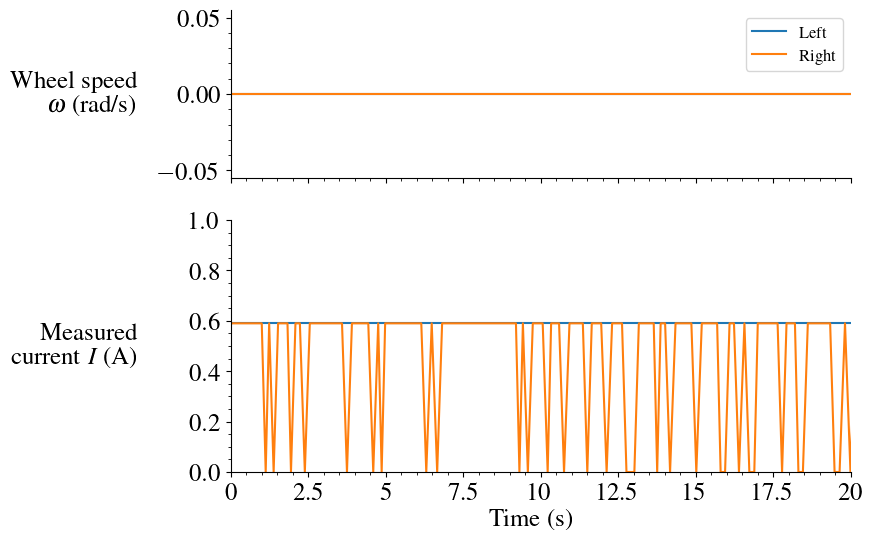

In [7]:
fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=(8, 6), height_ratios=[2, 3])
ax1.plot(odom_df.time_rel, odom_df.speed_L, label="Left")
ax1.plot(odom_df.time_rel, odom_df.speed_R, label="Right")
ax1.set_ylabel("Wheel speed\n$\\omega$ (rad/s)", rotation=0, ha="right", va="center")
ax1.legend(fontsize=12)
ax1.spines[["right", "top"]].set_visible(False)
ax1.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax1.yaxis.set_label_coords(-0.15, 0.5)

ax2.plot(elec_df.time_rel, elec_df.current_L, label="Left")
ax2.plot(elec_df.time_rel, elec_df.current_R, label="Right")
ax2.set_ylabel("Measured\ncurrent $I$ (A)", rotation=0, ha="right", va="center")
# ax2.legend(fontsize=12)
ax2.set_xlim((0, 20))
ax2.set_ylim((0, 1))
ax2.spines[["right", "top"]].set_visible(False)
ax2.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax2.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax2.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%g'))
ax2.yaxis.set_label_coords(-0.15, 0.5)

print(ax2.yaxis.get_label().get_position())

# fig.legend(*ax1.get_legend_handles_labels())
fig.supxlabel("Time (s)", fontsize=18)

for ext in u.EXTS:
    fig.savefig(figdir/f"husky-failure.{ext}", bbox_inches="tight")


# tikzplotlib.save("husky_failure.tex")


Text(0.5, 0.01, 'Time (s)')

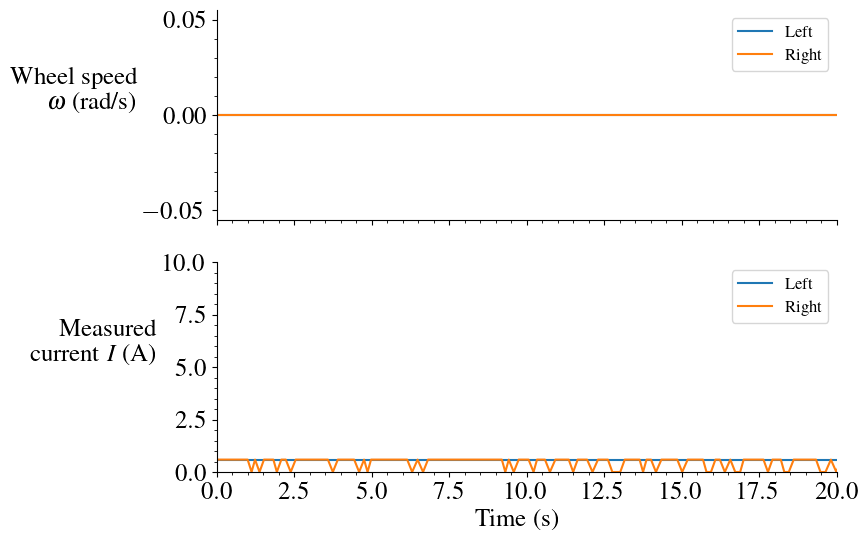

In [8]:
fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True,figsize=(8,6))
ax1.plot(odom_df.time_rel, odom_df.speed_L, label="Left")
ax1.plot(odom_df.time_rel, odom_df.speed_R, label="Right")
ax1.set_ylabel("Wheel speed\n$\\omega$ (rad/s)", rotation=0, ha="right")
ax1.legend(fontsize=12)
ax1.spines[['right', 'top']].set_visible(False)
ax1.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

ax2.plot(elec_df.time_rel, elec_df.current_L, label="Left")
ax2.plot(elec_df.time_rel, elec_df.current_R, label="Right")
ax2.set_ylabel("Measured\ncurrent $I$ (A)", rotation=0, ha="right")
ax2.legend(fontsize=12)
ax2.set_xlim((0,20))
ax2.set_ylim((0,10))
ax2.spines[['right', 'top']].set_visible(False)
ax2.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax2.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

fig.supxlabel("Time (s)", fontsize=18)

```tex
\documentclass{standalone}
\usepackage[utf8]{inputenc}
\usepackage{pgfplots}
\DeclareUnicodeCharacter{2212}{−}
\usepgfplotslibrary{groupplots,dateplot}
\usetikzlibrary{patterns,shapes.arrows}
\pgfplotsset{compat=newest}
```


In [9]:
# import tikzplotlib
# tikzplotlib.clean_figure()
# tikzplotlib.save("husky_failure.tex")